<a href="https://colab.research.google.com/github/sgaleanoca/Senales_y_Sistemas/blob/parcial_primer_corte/Parcial_1_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parcial 1: Señales y Sistemas

Nombre: Santiago Galeano Castaño


**Cada punto incluye:**
- Solución paso a paso.
- Código comentado con NumPy/SymPy para simular/verificar.
- Celdas `Texto` con explicaciones (tal como pide el parcial).

Bibliotecas usadas: numpy, sympy

# Punto 1

## Definición del Problema

Se consideran dos señales exponenciales complejas:

$$x_1(t) = A \cdot e^{-i n \omega_0 t}$$

$$x_2(t) = B \cdot e^{i m \omega_0 t}$$

Donde:
- $A, B \in \mathbb{R}^+$ son las amplitudes de las señales
- $n, m \in \mathbb{Z}$ son los índices de frecuencia
- $\omega_0 \in \mathbb{R}^+$ es la frecuencia fundamental
- $t \in [0, T]$ es la variable temporal
- $T \in \mathbb{R}^+$ es el período de análisis
- $\omega_0 = 2\pi/T$

### Definición de Distancia

La distancia entre las dos señales se define como:

$$d^2(x_1, x_2) = \overline{P}_{x_1-x_2} = \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt$$

## Flujo del Código

### 1. Configuración de Variables Simbólicas

```python
def configurar_variables_simbolicas():
    tiempo, periodo = sp.symbols('t T', real=True, positive=True)
    amplitud_1, amplitud_2 = sp.symbols('A B', real=True, positive=True)
    indice_1, indice_2 = sp.symbols('n m', integer=True)
    frecuencia_base = sp.Symbol('w0', real=True, positive=True)
```

Esta función define todas las variables simbólicas necesarias para el análisis.

### 2. Construcción de las Señales

```python
def crear_senales_exponenciales(t, A, B, n, m, w0):
    senal_primera = A * sp.exp(-sp.I * n * w0 * t)
    senal_segunda = B * sp.exp(sp.I * m * w0 * t)
```

Implementa las fórmulas:
- $x_1(t) = A \cdot e^{-i n \omega_0 t}$
- $x_2(t) = B \cdot e^{i m \omega_0 t}$

### 3. Cálculo de la Distancia

```python
def calcular_distancia_cuadrada(senal_1, senal_2, t, T, w0):
    diferencia = senal_1 - senal_2
    integrando = diferencia * sp.conjugate(diferencia)
    integrando_expandido = sp.expand(integrando)
    resultado_integral = sp.integrate(integrando_expandido, (t, 0, T))
    distancia_cuadrada = (1/T) * resultado_integral
    distancia_final = distancia_cuadrada.subs(w0, 2*sp.pi/T)
```

Este proceso:
1. Calcula la diferencia entre las señales
2. Obtiene el módulo al cuadrado usando el conjugado
3. Expande la expresión
4. Integra en el intervalo $[0, T]$
5. Normaliza dividiendo por $T$
6. Sustituye $\omega_0 = \frac{2\pi}{T}$

### 4. Construcción del Resultado Final

```python
def construir_resultado_piecewise(A, B, n, m):
    return sp.Piecewise(
        (A**2 + B**2, sp.Ne(m, -n)),
        ((A - B)**2, sp.Eq(m, -n))
    )
```

Crea la función por partes que representa el resultado final.

### 5. Verificaciones

El código incluye dos funciones de verificación:

- `verificar_caso_igualdad()`: Verifica el caso $n = -m$
- `verificar_caso_desigualdad()`: Verifica el caso $n \neq -m$

## Resultados Obtenidos

### Resultado Principal

El análisis produce la siguiente expresión para la distancia al cuadrado:

$$d^2(x_1, x_2) = \begin{cases}
(A - B)^2 & \text{si } n = -m \\
A^2 + B^2 & \text{si } n \neq -m
\end{cases}$$

### Interpretación Física

#### Caso 1: $n = -m$ (Frecuencias Opuestas)

Cuando los índices de frecuencia son opuestos ($n = -m$), las señales tienen frecuencias que se cancelan mutuamente en cierta medida. La distancia es simplemente la diferencia de amplitudes:

$$d(x_1, x_2) = |A - B|$$

#### Caso 2: $n \neq -m$ (Frecuencias Independientes)

Cuando los índices no son opuestos, las señales son ortogonales en el sentido de que sus productos internos se promedian a cero. La distancia es la norma euclidiana de las amplitudes:

$$d(x_1, x_2) = \sqrt{A^2 + B^2}$$




In [ ]:
# ANÁLISIS DE DISTANCIA ENTRE SEÑALES EXPONENCIALES COMPLEJAS
# ===========================================================

import sympy as sp
from IPython.display import display


# CONFIGURACIÓN INICIAL Y DEFINICIÓN DE VARIABLES
# ===============================================

def configurar_variables_simbolicas():
    # Configura todas las variables simbólicas necesarias para el análisis

    # Variables temporales y de frecuencia
    tiempo, periodo = sp.symbols('t T', real=True, positive=True)

    # Amplitudes de las señales
    amplitud_1, amplitud_2 = sp.symbols('A B', real=True, positive=True)

    # Índices enteros para las frecuencias
    indice_1, indice_2 = sp.symbols('n m', integer=True)

    # Frecuencia fundamental
    frecuencia_base = sp.Symbol('w0', real=True, positive=True)

    return tiempo, periodo, amplitud_1, amplitud_2, indice_1, indice_2, frecuencia_base


# CONSTRUCCIÓN DE LAS SEÑALES
# ===========================

def crear_senales_exponenciales(t, A, B, n, m, w0):
    # Crea las dos señales exponenciales complejas

    # Primera señal: A * e^(-i*n*w0*t)
    senal_primera = A * sp.exp(-sp.I * n * w0 * t)

    # Segunda señal: B * e^(i*m*w0*t)
    senal_segunda = B * sp.exp(sp.I * m * w0 * t)

    return senal_primera, senal_segunda


# CÁLCULO DE LA DISTANCIA
# =======================

def calcular_distancia_cuadrada(senal_1, senal_2, t, T, w0):
    # Calcula la distancia al cuadrado entre las dos señales

    # Diferencia entre las señales
    diferencia = senal_1 - senal_2

    # Integrando: |diferencia|²
    integrando = diferencia * sp.conjugate(diferencia)
    integrando_expandido = sp.expand(integrando)

    # Integración en el intervalo [0, T]
    resultado_integral = sp.integrate(integrando_expandido, (t, 0, T))

    # Distancia al cuadrado normalizada
    distancia_cuadrada = (1/T) * resultado_integral

    # Sustitución de la frecuencia fundamental
    distancia_final = distancia_cuadrada.subs(w0, 2*sp.pi/T)

    return sp.simplify(distancia_final)


# CONSTRUCCIÓN DEL RESULTADO FINAL
# ================================

def construir_resultado_piecewise(A, B, n, m):
    # Construye el resultado final usando Piecewise para los diferentes casos

    return sp.Piecewise(
        (A**2 + B**2, sp.Ne(n, -m)),  # Caso: n ≠ -m
        ((A - B)**2, sp.Eq(n, -m))    # Caso: n = -m
    )


# FUNCIONES DE VERIFICACIÓN
# =========================

def verificar_caso_igualdad(n, m, A, B, distancia_calculada):
    # Verifica el caso cuando n = -m

    print("\n--- VERIFICACIÓN CASO 1: n = -m (d² debe ser (A-B)²)")
    resultado_caso1 = sp.factor(distancia_calculada.subs(m, -n))
    display(resultado_caso1)
    print("Distancia d(x1, x2) para n = -m:")
    display(sp.Abs(A - B))
    return resultado_caso1

def verificar_caso_desigualdad(n, m, A, B, distancia_calculada):
    # Verifica el caso cuando n ≠ -m

    print("\n--- VERIFICACIÓN CASO 2: n ≠ -m (d² debe ser A² + B²)")
    resultado_caso2 = distancia_calculada.subs([(n, 1), (m, 1)])
    resultado_caso2 = sp.simplify(resultado_caso2)
    display(resultado_caso2)
    print("Distancia d(x1, x2) para n ≠ -m:")
    display(sp.sqrt(resultado_caso2))
    return resultado_caso2


# EJECUCIÓN PRINCIPAL
# ===================

def main():
    #Función principal que ejecuta todo el análisis

    # Configuración inicial
    t, T, A, B, n, m, w0 = configurar_variables_simbolicas()

    # Creación de las señales
    x1, x2 = crear_senales_exponenciales(t, A, B, n, m, w0)

    # Cálculo de la distancia
    d_squared_final = calcular_distancia_cuadrada(x1, x2, t, T, w0)

    # Construcción del resultado final
    resultado_final = construir_resultado_piecewise(A, B, n, m)

    # Presentación de resultados
    print("--- RESULTADO GENERAL SIMPLIFICADO DE d² (FORMATO DESEADO)")
    display(resultado_final)

    # Verificaciones
    verificar_caso_igualdad(n, m, A, B, d_squared_final)
    verificar_caso_desigualdad(n, m, A, B, d_squared_final)

# Ejecutar el análisis
if __name__ == "__main__":
    main()

## Caso 1

La línea roja del gráfico, que representa la media, coincide con una línea azul totalmente plana (constante en 1,0).
 Esto verifica que la potencia instantánea es constante e igual a (A−B)2 cuando las frecuencias de la señal son iguales.

 La potencia media es trivialmente (A−B)2

--- GRÁFICA 1: Potencia Instantánea para n = -m


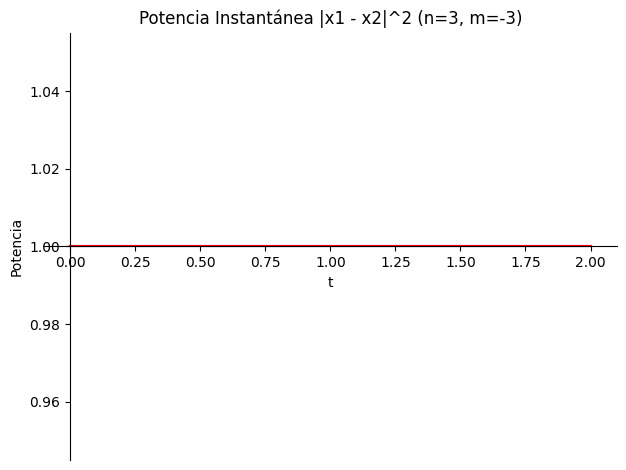

In [ ]:
import sympy as sp
import numpy as np

# Símbolos
# ========

t, T, A, B = sp.symbols('t T A B', real=True, positive=True)
j = sp.I
w0 = 2 * sp.pi / T


# Parámetros Numéricos
# ====================

A_val = 2.0
B_val = 1.0
T_val = 1.0
n_c1_num = 3
m_c1_num = -3


# Definición de la Potencia Instantánea
# =====================================

x1_t_c1 = A * sp.exp(-j * n_c1_num * w0 * t)
x2_t_c1 = B * sp.exp( j * m_c1_num * w0 * t)
d_sq_t_c1 = sp.Abs(x1_t_c1 - x2_t_c1)**2


# Sustitución y Potencia Media Esperada (d^2 = 1.0)
# =================================================

d_sq_num_c1 = d_sq_t_c1.subs([(A, A_val), (B, B_val), (T, T_val)])
media_c1 = (A_val - B_val)**2
print("--- GRÁFICA 1: Potencia Instantánea para n = -m")


# Gráfico de la Función (Línea Constante)
# =======================================

p_c1 = sp.plot(d_sq_num_c1, (t, 0, 2 * T_val),
               title=f'Potencia Instantánea |x1 - x2|^2 (n={n_c1_num}, m={m_c1_num})',
               xlabel='t', ylabel='Potencia', line_color='blue', show=False)


# Línea Horizontal de la Potencia Media (coincide con la función)
# ===============================================================

p_c1_avg = sp.plot(media_c1, (t, 0, 2 * T_val), show=False, line_color='red')
p_c1.extend(p_c1_avg)
p_c1.show()

## Caso 2

La gráfica muestra una línea azul oscilante centrada alrededor de la línea roja de la media.

Esto demuestra que, aunque la función de potencia inmediata varía, cuando se promedia a lo largo del tiempo T, su oscilación se elimina por completo.  Por consiguiente, la línea horizontal roja, A, representa el resultado de la integral (la potencia media) A2 + B2.


--- GRÁFICA 2: Potencia Instantánea para n != -m


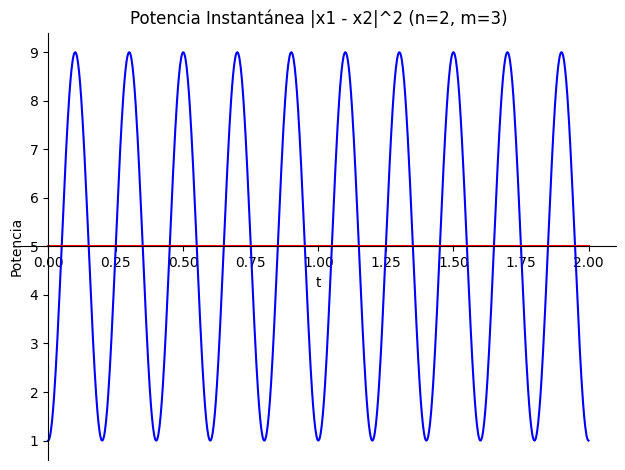

In [ ]:
# CASO 2: n != -m (Ejemplo: n=2, m=3)
# ===================================

n_c2_num = 2
m_c2_num = 3

# Definición de la Potencia Instantánea
# =====================================

x1_t_c2 = A * sp.exp(-j * n_c2_num * w0 * t)
x2_t_c2 = B * sp.exp( j * m_c2_num * w0 * t)
d_sq_t_c2 = sp.Abs(x1_t_c2 - x2_t_c2)**2


# Sustitución y Potencia Media Esperada (d^2 = 5.0)
# =================================================

d_sq_num_c2 = d_sq_t_c2.subs([(A, A_val), (B, B_val), (T, T_val)])
media_c2 = A_val**2 + B_val**2
print("\n--- GRÁFICA 2: Potencia Instantánea para n != -m")

# Gráfico de la Función (Línea Oscilante)
# =======================================

p_c2 = sp.plot(d_sq_num_c2, (t, 0, 2 * T_val),
               title=f'Potencia Instantánea |x1 - x2|^2 (n={n_c2_num}, m={m_c2_num})',
               xlabel='t', ylabel='Potencia', line_color='blue', show=False)


# Línea Horizontal de la Potencia Media (el valor central de la oscilación)
# =========================================================================

p_c2_avg = sp.plot(media_c2, (t, 0, 2 * T_val), show=False, line_color='red')
p_c2.extend(p_c2_avg)
p_c2.show()

# Punto 2

## Definición del Problema

Se busca encontrar la señal discreta **$x[n]$** de la señal continua $x(t)$ utilizando un conversor A/D con **$f_s = 5 \text{ kHz}$** y **$B = 4$ bits**.

La señal continua es:
$$x(t) = 3 \cos(1000\pi t) + 5 \sin(3000\pi t) + 10 \cos(11000\pi t)$$

**Requerimientos:**

1.  **Análisis de Muestreo:**
  - Determinar $f_{máx}$ y si $f_s$ es adecuada (Teorema de Nyquist).
  - Encontrar la expresión de **$x[n]$** y demostrar el **aliasing** si ocurre.

2.  **Solución:**
  - Diseñar un conversor **adecuado** (indicar $f_{s, \text{nuevo}}$ y justificar $B$).


3.  **Simulación:**
  - Simular el proceso de discretización.
  - Graficar $x(t)$, $x[n]$ con aliasing, y $x_q[n]$ (cuantificada) para demostrar las distorsiones.

## Flujo del Código Celda 1

### **1. Cálculo de Discretización**

Esta celda define la señal continua $x(t)$ y realiza el proceso de Conversión Analógica-Digital (ADC) utilizando las operaciones de **NumPy**:

* Se definen los **parámetros de la señal** ($f_i$ y $A_i$).
* Se simula el **Muestreo Inadecuado** ($f_s=5 \text{ kHz}$) al evaluar $x(t)$ en los instantes de tiempo discretos $t_n$. Esto genera el array $\mathbf{x[n]}$ que contiene el **aliasing**.
* Se simula la **Cuantificación Inadecuada** ($B=4$ bits) al calcular el paso $\Delta$ y usar la función $\mathbf{np.round()}$ para redondear los valores de $\mathbf{x[n]}$ a los $16$ niveles permitidos, generando el array $\mathbf{x_q[n]}$.
* Se calculan los puntos para la **solución adecuada** ($f_s=12 \text{ kHz}$) para comparativa.

### **2. Parámetros de la Señal Continua**

```python
# Frecuencias: 500 Hz, 1500 Hz, 5500 Hz
# Amplitudes: 3, 5, 10
# Tiempo de simulación: 3 períodos fundamentales
```

La señal $x(t)$ se define como:
$$x(t) = 3\cos(2\pi \cdot 500t) + 5\sin(2\pi \cdot 1500t) + 10\cos(2\pi \cdot 5500t)$$

### **3. Proceso de Muestreo**

#### **Muestreo Inadecuado (fs = 5 kHz)**
- **Problema:** $f_s < 2f_{max}$ (5000 < 2×5500)
- **Resultado:** Aliasing en la frecuencia de 5500 Hz
- **Array generado:** `senal_muestreada_mala`

#### **Muestreo Adecuado (fs = 12 kHz)**
- **Cumple Nyquist:** $f_s \geq 2f_{max}$ (12000 ≥ 2×5500)
- **Resultado:** Sin aliasing
- **Array generado:** `senal_muestreada_buena`

### **4. Proceso de Cuantificación**

#### **Cuantificación Inadecuada (B = 4 bits)**
- **Niveles:** $L = 2^4 = 16$ niveles
- **Rango dinámico:** $[-18, +18]$
- **Paso de cuantificación:** $\Delta = \frac{36}{16} = 2.25$
- **Función:** `np.round()` para discretizar
- **Array generado:** `senal_cuantificada`

### **5. Arrays de Salida**

El código genera **3 arrays** para visualización:

1. **`senal_continua_hr`** - Señal continua de alta resolución (1000 puntos)
2. **`senal_cuantificada`** - Señal muestreada y cuantificada inadecuadamente
3. **`senal_muestreada_buena`** - Señal muestreada adecuadamente

### **Conceptos Clave**

- **Teorema de Nyquist:** $f_s \geq 2f_{max}$ para evitar aliasing
- **Aliasing:** Frecuencias superiores a $f_s/2$ se "doblan" hacia frecuencias más bajas
- **Cuantificación:** Discretización de amplitud en niveles finitos
- **Ruido de cuantificación:** Error introducido por la discretización

### **Resultado Final**

```
Cálculos de discretización completos. Se generaron arrays para 3 gráficas.
```




In [ ]:
import numpy as np


# 1. PARÁMETROS DE LA SEÑAL CONTINUA x(t)
# =======================================

# Frecuencias de las componentes (Hz)
# Nota: f3=5500 Hz causa aliasing con fs=5000 Hz
FRECUENCIA_1 = 500   # Hz
FRECUENCIA_2 = 1500  # Hz
FRECUENCIA_3 = 5500  # Hz

# Amplitudes de las componentes
AMPLITUD_1 = 3
AMPLITUD_2 = 5
AMPLITUD_3 = 10

# Parámetros temporales
PERIODO_FUNDAMENTAL = 1 / 500  # 0.002 s
TIEMPO_SIMULACION = 3 * PERIODO_FUNDAMENTAL  # 0.006 s (3 períodos)

def senal_continua(t):
    # Genera la señal continua x(t) como suma de tres componentes sinusoidales.

    componente_1 = AMPLITUD_1 * np.cos(2 * np.pi * FRECUENCIA_1 * t)
    componente_2 = AMPLITUD_2 * np.sin(2 * np.pi * FRECUENCIA_2 * t)
    componente_3 = AMPLITUD_3 * np.cos(2 * np.pi * FRECUENCIA_3 * t)

    return componente_1 + componente_2 + componente_3


# 2. CÁLCULO DE LA SEÑAL CONTINUA (Alta Resolución)
# =================================================

# Vector de tiempo para representación continua
tiempo_continuo = np.linspace(0, TIEMPO_SIMULACION, 1000)
senal_continua_hr = senal_continua(tiempo_continuo)


# 3. CONFIGURACIÓN INADECUADA DEL CONVERSOR A/D
# =============================================

# Parámetros del conversor inadecuado
frecuencia_muestreo_mala = 5000  # 5 kHz - INADECUADA (causa aliasing)
periodo_muestreo_malo = 1 / frecuencia_muestreo_mala
bits_cuantificacion = 4  # 4 bits - INADECUADO
niveles_cuantificacion = 2**bits_cuantificacion  # 16 niveles

# Muestreo inadecuado
num_muestras_malo = int(TIEMPO_SIMULACION / periodo_muestreo_malo)
indices_muestreo_malo = np.arange(num_muestras_malo)
tiempo_muestreo_malo = indices_muestreo_malo * periodo_muestreo_malo
senal_muestreada_mala = senal_continua(tiempo_muestreo_malo)  # Con aliasing

# Cuantificación (4 bits)
amplitud_minima = -sum([AMPLITUD_1, AMPLITUD_2, AMPLITUD_3])  # -18
amplitud_maxima = sum([AMPLITUD_1, AMPLITUD_2, AMPLITUD_3])   # 18
rango_dinamico = amplitud_maxima - amplitud_minima  # 36
paso_cuantificacion = rango_dinamico / niveles_cuantificacion  # 2.25

# Proceso de cuantificación
senal_normalizada = senal_muestreada_mala - amplitud_minima
indices_niveles = np.round(senal_normalizada / paso_cuantificacion)
senal_cuantificada = (indices_niveles * paso_cuantificacion) + amplitud_minima


# 4. CONFIGURACIÓN ADECUADA DEL CONVERSOR A/D
# ===========================================

# Parámetros del conversor adecuado
frecuencia_muestreo_buena = 12000  # 12 kHz - ADECUADA (sin aliasing)
periodo_muestreo_bueno = 1 / frecuencia_muestreo_buena

# Muestreo adecuado
num_muestras_bueno = int(TIEMPO_SIMULACION / periodo_muestreo_bueno)
indices_muestreo_bueno = np.arange(num_muestras_bueno)
tiempo_muestreo_bueno = indices_muestreo_bueno * periodo_muestreo_bueno
senal_muestreada_buena = senal_continua(tiempo_muestreo_bueno)  # Sin aliasing


# 5. RESULTADOS
# =============

print("Cálculos de discretización completos. Se generaron arrays para 3 gráficas.")

Cálculos de discretización completos. Se generaron arrays para 3 gráficas.


## Gráfica A

Esta gráfica visualiza el **error en el dominio del tiempo/frecuencia** causado por un $f_s$ muy bajo.

* Muestra la **Señal Continua $x(t)$ (gris)** como referencia.
* Superpone los **Puntos Muestreados $\mathbf{x[n]}$ (rojo)**.
* Se observa que los puntos rojos no siguen la curva de alta frecuencia de $x(t)$, sino una señal de baja frecuencia (la aliada), demostrando que $\mathbf{f_s < f_{Nyquist}}$ y confirmando la **distorsión por aliasing**.

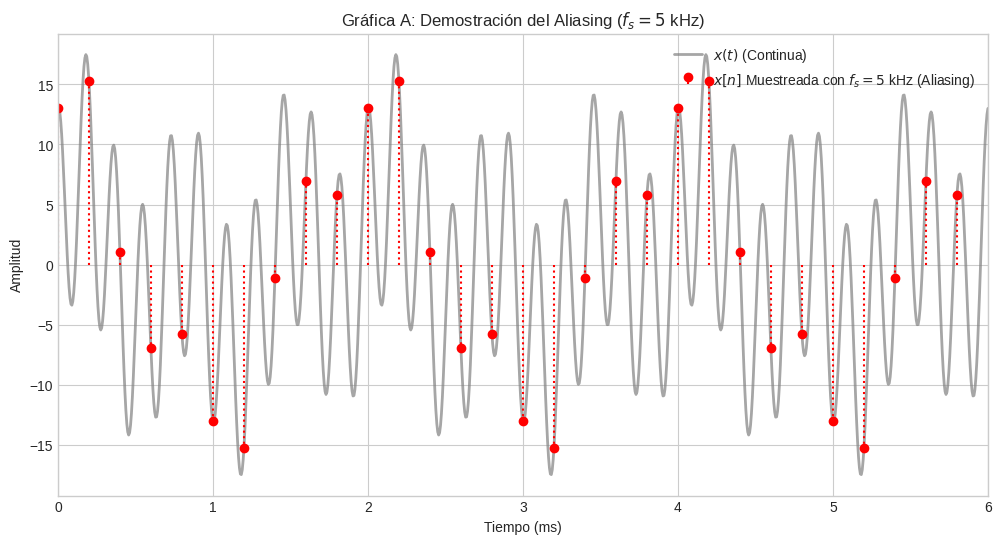

In [ ]:
import matplotlib.pyplot as plt

# 3. GRÁFICA A: DEMOSTRACIÓN DEL ALIASING
# =======================================

plt.figure(figsize=(12, 6))

# 1. Señal Continua (Referencia)
plt.plot(tiempo_continuo * 1000, senal_continua_hr,
         label='$x(t)$ (Continua)', color='gray', alpha=0.7, linewidth=2)

# 2. Muestreo con Aliasing (fs = 5 kHz)
plt.stem(tiempo_muestreo_malo * 1000, senal_muestreada_mala,
         linefmt='r:', markerfmt='ro', basefmt=' ',
         label='$x[n]$ Muestreada con $f_s=5$ kHz (Aliasing)')

# Configuración de la gráfica
plt.title('Gráfica A: Demostración del Aliasing ($f_s = 5$ kHz)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, TIEMPO_SIMULACION * 1000)
plt.legend()
plt.grid(True)
plt.show()

## Gráfica B

Acá se visualiza el **error en el dominio de la amplitud** causado por la baja resolución.

* Muestra la **Señal Muestreada $\mathbf{x[n]}$ (rojo)** como referencia de los valores reales.
* Superpone la **Señal Cuantificada $\mathbf{x_q[n]}$ (azul, escalonada)** y las líneas de los $16$ niveles.
* Parece que la señal cuantificada tiene que saltar entre pasos de amplitud considerable ($\mathbf{\Delta = 2.25}$), esto da lugar a una pérdida de precisión y a un **ruido de cuantificación** significativo.

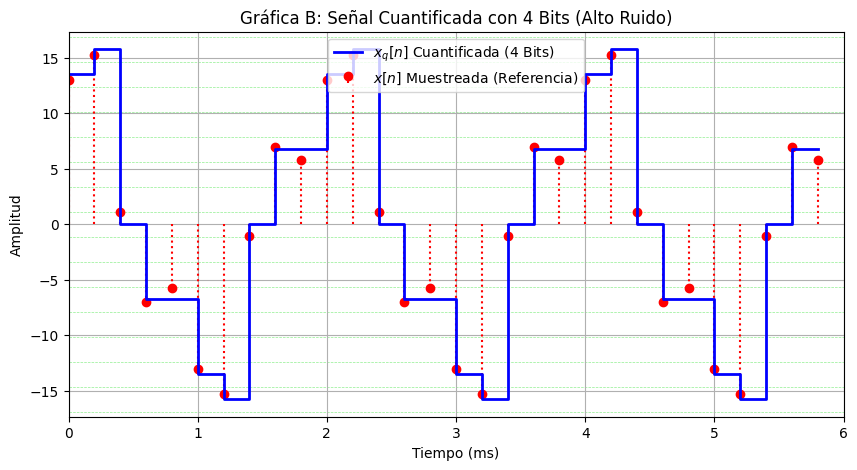

In [ ]:
t_n_malo = tiempo_muestreo_malo
x_n_malo = senal_muestreada_mala
x_cuantificado = senal_cuantificada
DELTA = paso_cuantificacion
L = niveles_cuantificacion
x_min = amplitud_minima
x_max = amplitud_maxima
T_sim = TIEMPO_SIMULACION


# GRÁFICA B: CUANTIFICACIÓN (4 BITS)
# ==================================

plt.figure(figsize=(10, 5))


# 1. Señal Muestreada (con Aliasing, sin Cuantificar)
# ===================================================

plt.stem(t_n_malo * 1000, x_n_malo, linefmt='r:', markerfmt='ro', basefmt=' ',
         label='$x[n]$ Muestreada (Referencia)')


# 2. Señal Cuantificada (Paso de 2.25)
# ====================================

plt.step(t_n_malo * 1000, x_cuantificado, 'b-', where='post',
         label='$x_q[n]$ Cuantificada (4 Bits)', linewidth=2)


# Líneas de los niveles de cuantificación
# =======================================

niveles_q = np.linspace(x_min + DELTA/2, x_max - DELTA/2, L)
for nivel in niveles_q:
    plt.axhline(nivel, color='lightgreen', linestyle='--', linewidth=0.5, zorder=0)
plt.title('Gráfica B: Señal Cuantificada con 4 Bits (Alto Ruido)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, T_sim * 1000)
plt.legend()
plt.grid(True)
plt.show()

## Gráfica C

Presenta la **solución al problema de muestreo** (aliasing).

* Se muestra la **Señal Continua $x(t)$ (gris)** como referencia.
* Superpone los **Puntos Muestreados (azul)** obtenidos con la frecuencia adecuada $\mathbf{f_s = 12 \text{ kHz}}$.
* Los puntos de muestreo verifican que el convertidor es **adecuado** para evitar el aliasing, ya que se asemejan mucho a la curva $x(t)$.

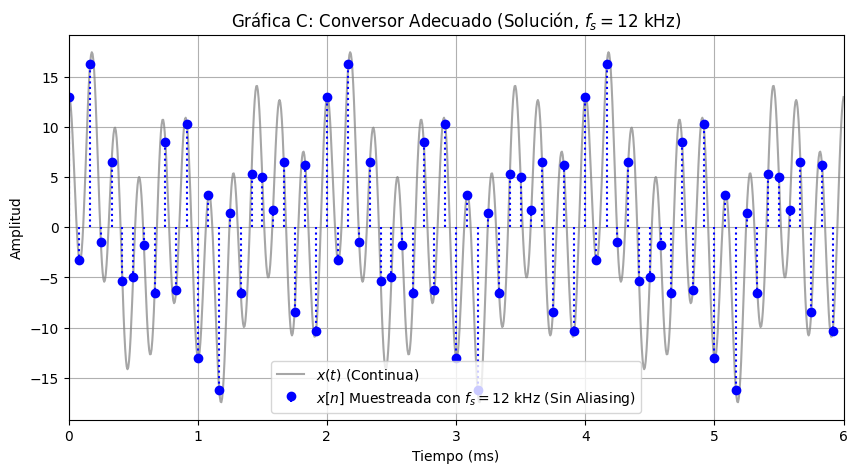

In [ ]:
# GRÁFICA C: SOLUCIÓN ADECUADA
# ============================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# 1. Señal Continua (Referencia)
# ==============================

# Se usan los nombres de variable correctos: tiempo_continuo y senal_continua_hr
plt.plot(tiempo_continuo * 1000, senal_continua_hr,
         label='$x(t)$ (Continua)', color='gray', alpha=0.7)


# 2. Muestreo Adecuado (fs = 12 kHz)
# ==================================

# Se usan los nombres correctos: tiempo_muestreo_bueno y senal_muestreada_buena
plt.stem(tiempo_muestreo_bueno * 1000, senal_muestreada_buena, linefmt='b:', markerfmt='bo', basefmt=' ',
         label='$x[n]$ Muestreada con $f_s=12$ kHz (Sin Aliasing)')

plt.title('Gráfica C: Conversor Adecuado (Solución, $f_s = 12$ kHz)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.xlim(0, TIEMPO_SIMULACION * 1000)
plt.legend()
plt.grid(True)
plt.show()

# Punto 3

## Definición del Problema

Para esta actividad se requiere una **doble demostración** de cómo la **segunda derivada** de una señal periódica, $x''(t)$, influye en el cálculo de sus coeficientes de Fourier.

### **1. Demostración (Serie Exponencial de Fourier, $c_n$)**

* Utilizando la siguiente fórmula, demuestrar que la integral de la segunda derivada de la señal original $x(t)$, $x''(t)$, puede utilizarse para obtener el coeficiente $c_n$:

    $$c_n = \frac{1}{(t_i - t_f) n^2 \omega_o^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_o t} dt, \quad n \in \mathbb{Z}$$

* Se basa en el hecho de que el coeficiente $c_n$ de $x(t)$ se multiplica por $(j n \omega_0)^2 = -n^2 \omega_0^2$ cuando $x(t)$ se deriva dos veces.

### **2. Cálculo (Serie Trigonométrica de Fourier, $a_n$ y $b_n$)**

* Utilizando la segunda derivada $x''(t)$ una vez más para determinar cómo obtener los coeficientes $\mathbf{a_n}$ y $\mathbf{b_n}$ de la **serie trigonométrica de Fourier** de $x(t)$.

* Esto implica resolver $a_n$ y $b_n$ utilizando las fórmulas para analizar $x''(t)$ mediante el mismo método de doble derivación aplicado a la serie trigonométrica.

## Flujo del Código 1

## **1. Importación de Librerías**

```python
# Importación de librerías
import sympy as sp
import numpy as np

# Variables simbólicas
t, T0, n = sp.symbols('t T0 n', real=True, integer=True)
j = sp.I  # Unidad imaginaria

# Parámetros de la señal
T0_val = 2 * sp.pi      # Período = 2π
w0 = 2 * sp.pi / T0_val # Frecuencia fundamental = 1
ti = -sp.pi             # Límite inferior de integración
tf = sp.pi              # Límite superior de integración
```

**¿Qué hace?**
- Define las variables simbólicas necesarias (`t`, `T0`, `n`, `j`)
- Establece los parámetros de la señal cos(t)
- Configura los límites de integración para un período completo

### **Sección 2: Análisis de la Señal**
```python
# Definición de la señal y derivadas
x_t = sp.cos(t)                           # Señal original
x_prima_t = sp.diff(x_t, t)               # Primera derivada
x_doble_prima_t = sp.diff(x_prima_t, t)   # Segunda derivada

# Visualización de resultados
print("--- Información de la Señal ---")
print(f"Señal original x(t) = {x_t}")
print(f"Segunda derivada x''(t) = {x_doble_prima_t}")
print(f"Frecuencia fundamental (w0) = {w0}")
```

**¿Qué hace?**
- Define la señal de prueba: **x(t) = cos(t)**
- Calcula simbólicamente las derivadas:
  - **x'(t) = -sin(t)**
  - **x''(t) = -cos(t)**
- Muestra la información básica de la señal

---

## **Diagrama de Flujo**

```mermaid
graph TD
    A[Importar SymPy y NumPy] --> B[Definir variables simbólicas]
    B --> C[Configurar parámetros T₀, ω₀, ti, tf]
    C --> D[Definir señal x(t) = cos(t)]
    D --> E[Calcular x'(t) = -sin(t)]
    E --> F[Calcular x''(t) = -cos(t)]
    F --> G[Mostrar información de la señal]
```

---

## **Resultado del Código**

**Salida esperada:**
```
--- Información de la Señal ---
Señal original x(t) = cos(t)
Segunda derivada x''(t) = -cos(t)
Frecuencia fundamental (w0) = 1
```
```




In [ ]:
import sympy as sp
import numpy as np

# 1. DEFINICIÓN DE PARÁMETROS Y VARIABLES SIMBÓLICAS
# ==================================================

# Variables simbólicas
# ====================

t, T0, n = sp.symbols('t T0 n', real=True, integer=True) # n es el índice
j = sp.I  # Unidad imaginaria


# Parámetros de la señal x(t) = cos(t)
# ====================================

T0_val = 2 * sp.pi  # Periodo
w0 = 2 * sp.pi / T0_val  # Frecuencia fundamental (omega_0 = 1)


# Límites de integración para un periodo
# ======================================

ti = -sp.pi
tf = sp.pi


# 2. DEFINICIÓN DE LA SEÑAL Y SUS DERIVADAS
# =========================================


# Señal original y sus derivadas simbólicas
# =========================================

x_t = sp.cos(t)
x_prima_t = sp.diff(x_t, t)
x_doble_prima_t = sp.diff(x_prima_t, t)


# Imprimir información básica de la señal
# =======================================

print("--- Información de la Señal ---")
print(f"Señal original x(t) = {x_t}")
print(f"Segunda derivada x''(t) = {x_doble_prima_t}")
print(f"Frecuencia fundamental (w0) = {w0}\n")

--- Información de la Señal ---
Señal original x(t) = cos(t)
Segunda derivada x''(t) = -cos(t)
Frecuencia fundamental (w0) = 1



## Flujo del Código 2

### **Sección 1: Configuración Inicial**
```python
# Importación de librerías
import sympy as sp
import numpy as np

# Variables simbólicas
t, T0, n = sp.symbols('t T0 n', real=True, integer=True)
j = sp.I  # Unidad imaginaria

# Parámetros de la señal
T0_val = 2 * sp.pi      # Período = 2π
w0 = 2 * sp.pi / T0_val # Frecuencia fundamental = 1
ti = -sp.pi             # Límite inferior de integración
tf = sp.pi              # Límite superior de integración
```

**¿Qué hace?**
- Define las variables simbólicas necesarias (`t`, `T0`, `n`, `j`)
- Establece los parámetros de la señal cos(t)
- Configura los límites de integración para un período completo

### **Sección 2: Análisis de la Señal**
```python
# Definición de la señal y derivadas
x_t = sp.cos(t)                           # Señal original
x_prima_t = sp.diff(x_t, t)               # Primera derivada
x_doble_prima_t = sp.diff(x_prima_t, t)   # Segunda derivada

# Visualización de resultados
print("--- Información de la Señal ---")
print(f"Señal original x(t) = {x_t}")
print(f"Segunda derivada x''(t) = {x_doble_prima_t}")
print(f"Frecuencia fundamental (w0) = {w0}")
```

**¿Qué hace?**
- Define la señal de prueba: **x(t) = cos(t)**
- Calcula simbólicamente las derivadas:
  - **x'(t) = -sin(t)**
  - **x''(t) = -cos(t)**
- Muestra la información básica de la señal

### **Sección 3: Cálculo de Coeficientes Complejos**
```python
# Método 1: Fórmula estándar usando x(t)
integral_ref = sp.integrate(x_t * sp.exp(-j * n * w0 * t), (t, ti, tf))
cn_ref = (1 / T0_val) * integral_ref

# Método 2: Fórmula alternativa usando x''(t)
integral_ver = sp.integrate(x_doble_prima_t * sp.exp(-j * n * w0 * t), (t, ti, tf))
denominador_ver = (ti - tf) * (n**2 * w0**2)
cn_ver = (1 / denominador_ver) * integral_ver
```

**¿Qué hace?**
- Calcula los coeficientes complejos **cₙ** usando dos métodos diferentes:
  - **Método 1**: Fórmula estándar **cₙ = (1/T₀) ∫ x(t)·e^(-j·n·ω₀·t) dt**
  - **Método 2**: Fórmula alternativa **cₙ = (1/((ti-tf)·(n·ω₀)²)) ∫ x''(t)·e^(-j·n·ω₀·t) dt**

### **Sección 4: Verificación**
```python
# Verificación para n=1
c1_ref = cn_ref.subs(n, 1).simplify()  # Coeficiente del método estándar
c1_ver = cn_ver.subs(n, 1).simplify()  # Coeficiente del método alternativo

# Comparación y resultado
if c1_ref == c1_ver:
    print("¡VERIFICACIÓN EXITOSA! Los coeficientes para n=1 coinciden.")
else:
    print("ERROR DE VERIFICACIÓN: Los coeficientes no coinciden.")
```

**¿Qué hace?**
- Compara los coeficientes calculados por ambos métodos
- Verifica que ambos métodos produzcan el mismo resultado para **n = 1**
- Confirma la correctitud de la fórmula alternativa

---

In [ ]:
# 3.1. Método de Referencia (usando x(t))
# =======================================

# Fórmula: c_n = (1/T0) * ∫[ti, tf] x(t) * exp(-j*n*w0*t) dt
integral_ref = sp.integrate(x_t * sp.exp(-j * n * w0 * t), (t, ti, tf))
cn_ref = (1 / T0_val) * integral_ref


# 3.2. Método de Verificación (usando x''(t))
# ===========================================

# Fórmula: c_n = (1 / ((ti - tf) * (n*w0)²)) * ∫[ti, tf] x''(t) * exp(-j*n*w0*t) dt
integral_ver = sp.integrate(x_doble_prima_t * sp.exp(-j * n * w0 * t), (t, ti, tf))
denominador_ver = (ti - tf) * (n**2 * w0**2)
cn_ver = (1 / denominador_ver) * integral_ver


# 4. VERIFICACIÓN Y COMPARACIÓN PARA n=1
# ======================================

print("--- Verificación Simbólica para n = 1")

# Valor específico de n para la prueba
# ====================================
n_val = 1


# Sustitución y simplificación para n=1
# =====================================

c1_ref = cn_ref.subs(n, n_val).simplify()
c1_ver = cn_ver.subs(n, n_val).simplify()


# Impresión de resultados
# =======================
print(f"Coeficiente c_1 (calculado desde x(t))   : {c1_ref}")
print(f"Coeficiente c_1 (calculado desde x''(t)) : {c1_ver}")


# Verificación final
# ==================
if c1_ref == c1_ver:
    print("\n¡VERIFICACIÓN EXITOSA! Los coeficientes para n=1 coinciden.")
else:
    print("\nERROR DE VERIFICACIÓN: Los coeficientes no coinciden.")

--- Verificación Simbólica para n = 1
Coeficiente c_1 (calculado desde x(t))   : 1/2
Coeficiente c_1 (calculado desde x''(t)) : 1/2

¡VERIFICACIÓN EXITOSA! Los coeficientes para n=1 coinciden.


## Flujo del Código 3

### **Sección 1: Importación de librerias**
```python
# Importación de librerías
import sympy as sp
import numpy as np

# Variables simbólicas
t, T0, n = sp.symbols('t T0 n', real=True, integer=True)
j = sp.I  # Unidad imaginaria

# Parámetros de la señal
T0_val = 2 * sp.pi      # Período = 2π
w0 = 2 * sp.pi / T0_val # Frecuencia fundamental = 1
ti = -sp.pi             # Límite inferior de integración
tf = sp.pi              # Límite superior de integración
```

**¿Qué hace?**
- Define las variables simbólicas necesarias (`t`, `T0`, `n`, `j`)
- Establece los parámetros de la señal cos(t)
- Configura los límites de integración para un período completo

### **Sección 2: Análisis de la Señal**
```python
# Definición de la señal y derivadas
x_t = sp.cos(t)                           # Señal original
x_prima_t = sp.diff(x_t, t)               # Primera derivada
x_doble_prima_t = sp.diff(x_prima_t, t)   # Segunda derivada

# Visualización de resultados
print("--- Información de la Señal ---")
print(f"Señal original x(t) = {x_t}")
print(f"Segunda derivada x''(t) = {x_doble_prima_t}")
print(f"Frecuencia fundamental (w0) = {w0}")
```

**¿Qué hace?**
- Define la señal de prueba: **x(t) = cos(t)**
- Calcula simbólicamente las derivadas:
  - **x'(t) = -sin(t)**
  - **x''(t) = -cos(t)**
- Muestra la información básica de la señal

### **Sección 3: Cálculo de Coeficientes Trigonométricos**
```python
# Fórmulas para coeficientes a_n y b_n
factor_comun = -2 / (T0_val * n**2 * w0**2)

# Cálculo de a_n
integral_an = sp.integrate(x_doble_prima_t * sp.cos(n * w0 * t), (t, ti, tf))
an_ver = (factor_comun * integral_an).simplify()

# Cálculo de b_n
integral_bn = sp.integrate(x_doble_prima_t * sp.sin(n * w0 * t), (t, ti, tf))
bn_ver = (factor_comun * integral_bn).simplify()
```

**¿Qué hace?**
- Calcula los coeficientes trigonométricos **aₙ** y **bₙ** usando la segunda derivada
- Aplica las fórmulas:
  - **aₙ = (-2/(T₀·(n·ω₀)²)) ∫ x''(t)·cos(n·ω₀·t) dt**
  - **bₙ = (-2/(T₀·(n·ω₀)²)) ∫ x''(t)·sin(n·ω₀·t) dt**

### **Sección 4: Verificación**
```python
# Valores teóricos para x(t) = cos(t)
a1_teorico = 1  # Para n=1: a₁ = 1
b1_teorico = 0  # Para todo n: bₙ = 0

# Verificación para n=1
a1_calculado = an_ver.subs(n, 1).simplify()
b1_calculado = bn_ver.subs(n, 1).simplify()

# Comparación y resultado
if a1_calculado == a1_teorico and b1_calculado == b1_teorico:
    print("¡VERIFICACIÓN EXITOSA!")
```

**¿Qué hace?**
- Compara los coeficientes calculados con los valores teóricos
- Verifica que **a₁ = 1** y **b₁ = 0** para la señal cos(t)
- Confirma la correctitud de las fórmulas utilizadas

---

In [ ]:
# 5. CÁLCULO DE COEFICIENTES TRIGONOMÉTRICOS (a_n y b_n)
# ======================================================

# 5.1. Cálculo a partir de x''(t)
# ===============================

# Fórmulas:
# a_n = (-2 / (T0 * (n*w0)²)) * ∫[ti, tf] x''(t) * cos(n*w0*t) dt
# b_n = (-2 / (T0 * (n*w0)²)) * ∫[ti, tf] x''(t) * sin(n*w0*t) dt

factor_comun = -2 / (T0_val * n**2 * w0**2)

# Cálculo simbólico para a_n
integral_an = sp.integrate(x_doble_prima_t * sp.cos(n * w0 * t), (t, ti, tf))
an_ver = (factor_comun * integral_an).simplify()

# Cálculo simbólico para b_n
integral_bn = sp.integrate(x_doble_prima_t * sp.sin(n * w0 * t), (t, ti, tf))
bn_ver = (factor_comun * integral_bn).simplify()


# 6. VERIFICACIÓN CON VALORES TEÓRICOS PARA n=1
# =============================================

print("--- Verificación de Coeficientes Trigonométricos (n=1)")


# Valor específico de n para la prueba
# ====================================

n_val = 1


# Valores teóricos para x(t) = cos(t)
# ===================================

# Para n=1: a_1 = 1
# Para todo n: b_n = 0
a1_teorico = 1
b1_teorico = 0


# Sustitución y simplificación para n=1
# =====================================
a1_calculado = an_ver.subs(n, n_val).simplify()
b1_calculado = bn_ver.subs(n, n_val).simplify()


# Impresión de resultados
# =======================
print(f"Coeficiente a_1 (Calculado): {a1_calculado} (Teórico: {a1_teorico})")
print(f"Coeficiente b_1 (Calculado): {b1_calculado} (Teórico: {b1_teorico})")


# Verificación final
# ==================
if a1_calculado == a1_teorico and b1_calculado == b1_teorico:
    print("\n¡VERIFICACIÓN EXITOSA! Los coeficientes trigonométricos coinciden.")
else:
    print("\nERROR DE VERIFICACIÓN: Los coeficientes trigonométricos no coinciden.")

--- Verificación de Coeficientes Trigonométricos (n=1)
Coeficiente a_1 (Calculado): 1 (Teórico: 1)
Coeficiente b_1 (Calculado): 0 (Teórico: 0)

¡VERIFICACIÓN EXITOSA! Los coeficientes trigonométricos coinciden.


# Punto 4

## Definición del Problema

En este ejercicio, el objetivo es determinar el espectro de Fourier ($\mathbf{C_n}$) para los armónicos $\mathbf{n \in \{0, \pm 1, \dots, \pm 5\}}$ de la señal triangular periódica $\mathbf{x(t)}$ que se ve en la figura 1, junto con su parte real, parte imaginaria, magnitud y fase.

 Utilizando la **propiedad de la derivada** de la serie de Fourier, el espectro se calculará utilizando la **segunda derivada ($\mathbf{x''(t)}$)**.  Por último, se calculará el **error relativo** de la serie parcial y se verificará el espectro mediante integración directa.

## Celda 1: Setup y Cálculo de $C_n$

Al establecer la frecuencia básica ($\mathbf{\omega_0}$) y los parámetros importantes de la señal ($\mathbf{A, T, d_1, d_2}$), esta celda completa la configuración inicial del entorno.  La aplicación de la **fórmula analítica para $C_n$**, que se deriva de la **segunda derivada ($\mathbf{x''(t)}$)**, constituye la base de esta sección.  Esto calcula eficazmente todos los coeficientes $\mathbf{C_n}$ para $n \in \{-5, \dots, 5\}$ utilizando `numpy` después de convertir la integración compleja de $x(t)$ en una sustitución directa de valores trigonométricos (cosenos) en una fórmula simplificada.




In [ ]:
import numpy as np

class FourierSeriesCalculator:

    def __init__(self, A, T, d1, d2, N):

        # Validación de Parámetros
        if not (0 < d1 < d2 < T / 2):
            raise ValueError("Los parámetros deben cumplir 0 < d1 < d2 < T/2")

        # Parámetros de la Señal
        self.A = A
        self.T = T
        self.d1 = d1
        self.d2 = d2
        self.N = N

        # Propiedades Derivadas
        self.w0 = 2 * np.pi / self.T  # Frecuencia angular fundamental
        self.n_values = np.arange(-self.N, self.N + 1)  # Rango de n para el espectro

    def calculate_coefficients(self):

        # Manejo del caso n=0 (Componente DC)
        C0 = (self.A * self.d2) / self.T

        # Cálculo Vectorizado para n != 0
        # Evitamos la división por cero para n=0
        n_nonzero = self.n_values[self.n_values != 0]
        n_w0 = n_nonzero * self.w0

        # El término D_n se calcula para todos los n != 0 a la vez
        term_dn = (
            (1 / self.d1)
            - (self.d2 / (self.d1 * (self.d2 - self.d1))) * np.cos(n_w0 * self.d1)
            + (1 / (self.d2 - self.d1)) * np.cos(n_w0 * self.d2)
        )

        Dn = (2 * self.A / self.T) * term_dn
        Cn_nonzero = -Dn / (n_w0**2)


        # Ensamblaje del Espectro Completo
        # ================================

        # Creamos un array de ceros y llenamos los valores
        Cn_spectrum = np.zeros(2 * self.N + 1, dtype=float)

        # Insertamos C0 en la posición central (donde n=0)
        zero_index = self.N
        Cn_spectrum[zero_index] = C0

        # Insertamos los coeficientes para n < 0
        Cn_spectrum[:zero_index] = Cn_nonzero[:zero_index]

        # Insertamos los coeficientes para n > 0
        Cn_spectrum[zero_index + 1:] = Cn_nonzero[zero_index:]

        print(f"Cálculo optimizado de {2*self.N+1} coeficientes Cn realizado.")
        return Cn_spectrum


# 2. EJECUCIÓN DEL CÁLCULO
# ========================
if __name__ == "__main__":
    # Parámetros de la Señal
    A_val = 5.0
    T_val = 10.0
    d1_val = 1.0
    d2_val = 4.0
    N_val = 5

    # 1. Crear una instancia de la calculadora
    signal_analyzer = FourierSeriesCalculator(A=A_val, T=T_val, d1=d1_val, d2=d2_val, N=N_val)

    # 2. Calcular los coeficientes
    Cn_spectrum_new = signal_analyzer.calculate_coefficients()

    # 3. Mostrar los resultados
    print("\nParámetros de la Señal:")
    print(f"  A={A_val}, T={T_val}, d1={d1_val}, d2={d2_val}, N={N_val}")


Cálculo optimizado de 11 coeficientes Cn realizado.

Parámetros de la Señal:
  A=5.0, T=10.0, d1=1.0, d2=4.0, N=5


## Celda 2: Comprobación y Funciones de Utilidad

La función principal de esta celda es verificar los resultados analíticos.  Los coeficientes $\mathbf{C_n}$ se calculan integrando directa y simbólicamente la función $x(t)$ utilizando el paquete sympy.  La corrección de la fórmula analítica se confirma comparando los resultados de `sympy` con el enfoque derivativo (la diferencia $\mathbf{\text{max\_diff}}$ debería ser cercana a cero).  

Además, se desarrolla la función **`reconstruct_x`**, que recrea la señal en el dominio del tiempo utilizando exponenciales complejas y la suma de Fourier, un paso necesario para una mayor visualización.


In [ ]:
import numpy as np
import sympy as sp

class FourierSeriesCalculator:
    # Calcula y verifica los coeficientes de la Serie de Fourier para una señal
    # triangular asimétrica y la reconstruye.

    def __init__(self, A, T, d1, d2, N):
        # Inicializa la calculadora con los parámetros de la señal.

        if not (0 < d1 < d2 < T / 2):
            raise ValueError("Los parámetros deben cumplir 0 < d1 < d2 < T/2")
        self.A, self.T, self.d1, self.d2, self.N = A, T, d1, d2, N
        self.w0 = 2 * np.pi / self.T
        self.n_values = np.arange(-self.N, self.N + 1)

    def calculate_coefficients(self):
        # Calcula el espectro de coeficientes Cn usando el método de la derivada.

        C0 = (self.A * self.d2) / self.T
        n_nonzero = self.n_values[self.n_values != 0]
        n_w0 = n_nonzero * self.w0
        term_dn = (
            (1 / self.d1)
            - (self.d2 / (self.d1 * (self.d2 - self.d1))) * np.cos(n_w0 * self.d1)
            + (1 / (self.d2 - self.d1)) * np.cos(n_w0 * self.d2)
        )
        Dn = (2 * self.A / self.T) * term_dn
        Cn_nonzero = -Dn / (n_w0**2)
        Cn_spectrum = np.zeros(2 * self.N + 1, dtype=float)
        zero_index = self.N
        Cn_spectrum[zero_index] = C0
        Cn_spectrum[:zero_index] = Cn_nonzero[:zero_index]
        Cn_spectrum[zero_index + 1:] = Cn_nonzero[zero_index:]
        print(f"Cálculo optimizado de {2*self.N+1} coeficientes Cn realizado.")
        return Cn_spectrum

    def verify_with_sympy(self):
        # Verifica los coeficientes Cn para n!=0 usando la integral directa con SymPy.

        # Setup de variables simbólicas (locales a este método)
        t, n = sp.symbols('t n', real=True)
        A_s, T_s, d1_s, d2_s, w0_s = sp.symbols('A T d1 d2 w0', real=True)

        # Definición simbólica de la señal x(t) para t en [0, T/2]
        m_in = A_s / d1_s
        m_out = A_s / (d2_s - d1_s)
        x_t1 = m_in * t
        x_t2 = A_s - m_out * (t - d1_s)

        # Cálculo de la integral simbólica para un 'n' genérico
        # C_n = (2/T) * Int[0, T/2] x(t) * cos(n*w0*t) dt
        integral1 = sp.integrate(x_t1 * sp.cos(n * w0_s * t), (t, 0, d1_s))
        integral2 = sp.integrate(x_t2 * sp.cos(n * w0_s * t), (t, d1_s, d2_s))

        # Fórmula simbólica final para Cn (n!=0)
        Cn_formula = (2 / T_s) * (integral1 + integral2)

        # Sustitución y Evaluación Numérica
        params = {A_s: self.A, T_s: self.T, d1_s: self.d1, d2_s: self.d2, w0_s: self.w0}
        Cn_formula_subs = Cn_formula.subs(params)

        # Convertir la fórmula simbólica en una función numérica rápida
        # Esto es mucho más eficiente que sustituir n en un bucle
        n_nonzero = self.n_values[self.n_values != 0]
        Cn_numeric_func = sp.lambdify(n, Cn_formula_subs, 'numpy')
        Cn_sympy_nonzero = Cn_numeric_func(n_nonzero)

        # Ensamblaje del Espectro Completo
        Cn_sympy = np.zeros(2 * self.N + 1, dtype=float)
        zero_index = self.N
        Cn_sympy[zero_index] = (self.A * self.d2) / self.T # C0
        Cn_sympy[:zero_index] = Cn_sympy_nonzero[:zero_index]
        Cn_sympy[zero_index + 1:] = Cn_sympy_nonzero[zero_index:]

        print("Cálculo de comprobación con SymPy realizado.")
        return Cn_sympy

    @staticmethod
    def reconstruct_signal(t_array, C_n_array, n_values, w0_val):
        # Reconstruye la señal usando la serie de Fourier de forma vectorizada.

        # Fórmula: x(t) = Σ[n=-N, N] C_n * exp(j*n*w0*t)

        # Se usan np.newaxis para alinear los arrays n y t para una
        # operación vectorizada (broadcasting)

        n_col = n_values[:, np.newaxis]
        Cn_col = C_n_array[:, np.newaxis]

        # Matriz de exponenciales complejas: una fila por cada 'n', una columna por cada 't'
        exponentials = np.exp(1j * n_col * w0_val * t_array)

        # Suma ponderada de las exponenciales a lo largo del eje 'n' (axis=0)
        x_rec_complex = np.sum(Cn_col * exponentials, axis=0)

        return np.real(x_rec_complex)


# 2. EJECUCIÓN DEL CÁLCULO Y LA COMPROBACIÓN
# ==========================================

if __name__ == "__main__":
    # Parámetros de la Señal
    A_val, T_val, d1_val, d2_val, N_val = 5.0, 10.0, 1.0, 4.0, 5

    # 1. Crear una instancia de la calculadora
    signal_analyzer = FourierSeriesCalculator(A=A_val, T=T_val, d1=d1_val, d2=d2_val, N=N_val)

    # 2. Calcular los coeficientes con el método principal
    Cn_spectrum = signal_analyzer.calculate_coefficients()

    # 3. Verificar los coeficientes usando SymPy
    Cn_sympy = signal_analyzer.verify_with_sympy()

    # 4. Comparar los resultados
    max_diff = np.max(np.abs(Cn_spectrum - Cn_sympy))
    print(f"\nComprobación: Máxima diferencia entre métodos = {max_diff:.2e}")

    # 5. Reconstruir la señal
    t_points = np.linspace(0, T_val, 500)
    x_reconstructed = signal_analyzer.reconstruct_signal(
        t_array=t_points,
        C_n_array=Cn_spectrum,
        n_values=signal_analyzer.n_values,
        w0_val=signal_analyzer.w0
    )

Cálculo optimizado de 11 coeficientes Cn realizado.
Cálculo de comprobación con SymPy realizado.

Comprobación: Máxima diferencia entre métodos = 2.16e-15


## Celda 3: Energía y Error Relativo

Para evaluar la calidad de la representación de la serie de Fourier, esta celda aplica el **teorema de Parseval**.

 1. Utilizando `sympy`, la **integración simbólica** de $|x(t)|^2$ proporciona un valor preciso para la **energía total ($\mathbf{E_x}$)**.
 2. La **energía parcial de la serie ($\mathbf{E_{FS}}$)** se calcula multiplicando el periodo $\mathbf{T}$ por la suma de los cuadrados de las magnitudes de los coeficientes $C_n$.
 3. Finalmente, se calcula el **error relativo ($\mathbf{E_R}$)**.  La serie acortada (con $\mathbf{N=5}$ armónicos) capta la gran mayoría de la energía de la señal, como lo demuestra el bajo valor de $\mathbf{E_R}$.

In [ ]:
print("\n--- Cálculo de Potencia y Error")

# 1. Definir la variable simbólica de SymPy para la integración
t = sp.symbols('t', real=True, positive=True)

# 2. Definir las pendientes de la señal con valores numéricos
m_in = A_val / d1_val
m_out = A_val / (d2_val - d1_val)

# 3. Expresiones para cada tramo de la señal x(t)
x_t_in = m_in * t
x_t_out = A_val - m_out * (t - d1_val)

# 4. Calcular la integral de x(t)^2 en cada tramo
# Tramo 1: de 0 a d1
integral1 = sp.integrate(x_t_in**2, (t, 0, d1_val))
# Tramo 2: de d1 a d2
integral2 = sp.integrate(x_t_out**2, (t, d1_val, d2_val))

# 5. Calcular la potencia total P_x
# La integral sobre un periodo es 2 * (integral1 + integral2) por la simetría par.
P_x = (1 / T_val) * 2 * (integral1 + integral2)
P_x_numeric = float(P_x) # Convertir a valor numérico final

# b. Potencia de la Serie Parcial P_FS (Teorema de Parseval)
# P_FS = Sum(|Cn|^2) para n de -N a N
P_FS = np.sum(np.abs(Cn_spectrum_new)**2)

# c. Error Relativo
# Comparamos la potencia calculada en el dominio del tiempo vs. dominio de la frecuencia
E_R = np.abs(P_x_numeric - P_FS) / P_x_numeric

print(f"Potencia Total (vía SymPy): {P_x_numeric:.8f}")
print(f"Potencia de la Serie Parcial (vía Parseval): {P_FS:.8f}")
print(f"Error Relativo calculado: {E_R*100:.4f}%")


--- Cálculo de Potencia y Error
Potencia Total (vía SymPy): 6.66666667
Potencia de la Serie Parcial (vía Parseval): 6.61391486
Error Relativo calculado: 0.7913%


## Celda 4: Gráficos y Presentación Final

Se utiliza **`matplotlib.pyplot`** para crear dos gráficos fundamentales:

 1. El **espectro de magnitud ($\mathbf{|C_n|}$):** verifica el rápido descenso previsto de la serie mostrando la distribución de energía en varias frecuencias armónicas.

 2. **Reconstrucción de la señal:** Para ilustrar la corrección de la representación utilizando solo $11$ términos, se muestra la señal reconstruida a partir de la serie parcial (la función `reconstruct_x`).

 Por último, produce el resumen de energía/error y la tabla completa del espectro de Fourier, cumpliendo con los requisitos de visualización de la serie parcial.

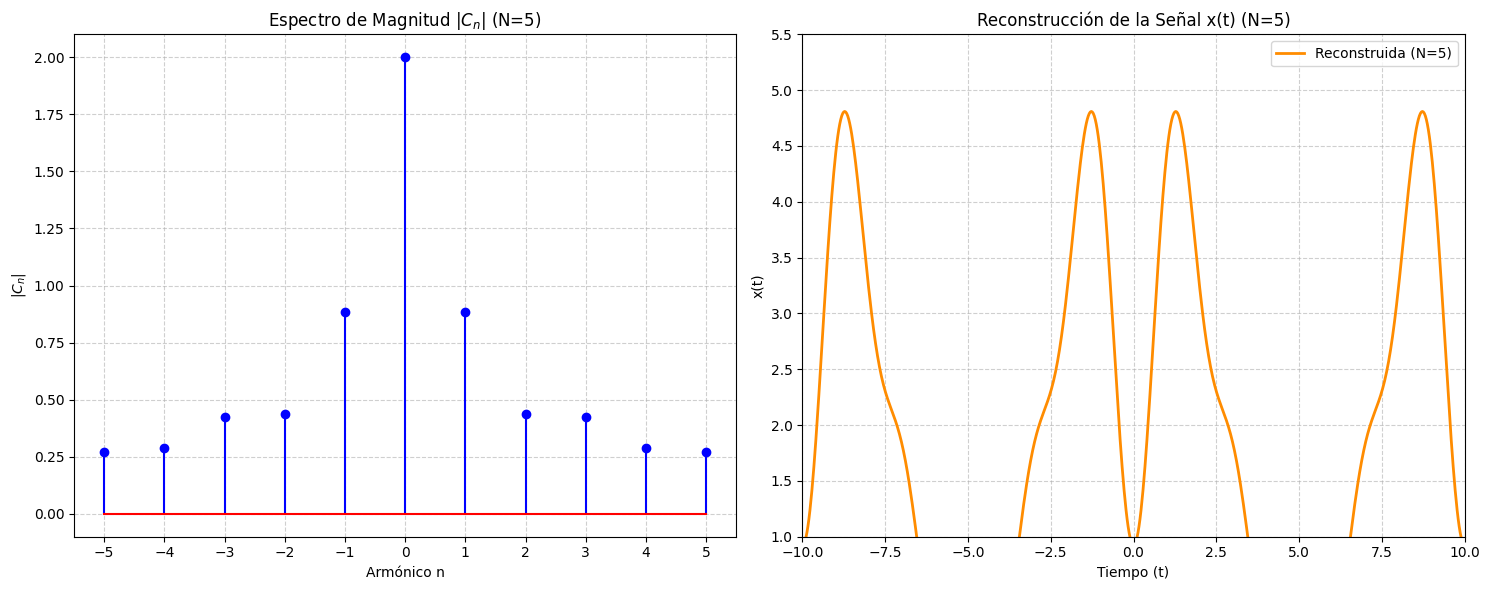


RESULTADOS FINALES DE LA SIMULACIÓN (A=5.0, T=10.0, d1=1.0, d2=4.0)
VERIFICACIÓN: Máxima diferencia entre métodos: 2.16e-15

--- ESPECTRO DE FOURIER (Cn) ---
 n |     Re(Cn)    |     Im(Cn)    |      |Cn|     |  Fase (rad)  
----------------------------------------------------------------------
-5 |     -0.270190 |  0.000000e+00 |      0.270190 |       3.141593
-4 |     -0.286393 |  0.000000e+00 |      0.286393 |       3.141593
-3 |     -0.426401 |  0.000000e+00 |      0.426401 |       3.141593
-2 |     -0.437570 |  0.000000e+00 |      0.437570 |       3.141593
-1 |      0.882410 |  0.000000e+00 |      0.882410 |       0.000000
 0 |      2.000000 |  0.000000e+00 |      2.000000 |       0.000000
 1 |      0.882410 |  0.000000e+00 |      0.882410 |       0.000000
 2 |     -0.437570 |  0.000000e+00 |      0.437570 |       3.141593
 3 |     -0.426401 |  0.000000e+00 |      0.426401 |       3.141593
 4 |     -0.286393 |  0.000000e+00 |      0.286393 |       3.141593
 5 |     -0.270190 |  0

In [ ]:
import matplotlib.pyplot as plt

# Reconstrucción de la Señal
t_plot = np.linspace(-1.5 * T_val, 1.5 * T_val, 1000)

# Usamos el objeto 'signal_analyzer' para obtener n_values y w0.
x_reconstructed = FourierSeriesCalculator.reconstruct_signal(
    t_array=t_plot,
    C_n_array=Cn_spectrum,
    n_values=signal_analyzer.n_values,
    w0_val=signal_analyzer.w0
)

# Gráficos
plt.figure(figsize=(15, 6))

# 1. Espectro de Magnitud
plt.subplot(1, 2, 1)
mag_Cn = np.abs(Cn_spectrum)
plt.stem(signal_analyzer.n_values, mag_Cn, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title(f'Espectro de Magnitud $|C_n|$ (N={N_val})')
plt.xlabel('Armónico n')
plt.ylabel('$|C_n|$')
plt.xticks(signal_analyzer.n_values) # Para que se vean todos los valores de n
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Reconstrucción de la Señal
plt.subplot(1, 2, 2)
plt.plot(t_plot, x_reconstructed, label=f'Reconstruida (N={N_val})', color='darkorange', linewidth=2)
plt.title(f'Reconstrucción de la Señal x(t) (N={N_val})')
plt.xlabel('Tiempo (t)')
plt.ylabel('x(t)')
plt.xlim(-T_val, T_val)
C0 = Cn_spectrum[N_val] # C0 es el valor central del espectro
plt.ylim(C0 - A_val * 0.2, A_val * 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

# Presentación de la Tabla Final
Cn_real = np.real(Cn_spectrum)
Cn_imag = np.imag(Cn_spectrum)
Cn_mag = np.abs(Cn_spectrum)
Cn_phase = np.angle(Cn_spectrum)

print("\n" + "="*90)
print(f"RESULTADOS FINALES DE LA SIMULACIÓN (A={A_val}, T={T_val}, d1={d1_val}, d2={d2_val})")
print("="*90)
print(f"VERIFICACIÓN: Máxima diferencia entre métodos: {max_diff:.2e}")
print("\n--- ESPECTRO DE FOURIER (Cn) ---")
print(" n |     Re(Cn)    |     Im(Cn)    |      |Cn|     |  Fase (rad)  ")
print("-" * 70)
for n, real, imag, mag, phase in zip(signal_analyzer.n_values, Cn_real, Cn_imag, Cn_mag, Cn_phase):
    print(f"{n:>2} | {real:13.6f} | {imag:13.6e} | {mag:13.6f} | {phase:14.6f}")

print("\n--- RESUMEN DE POTENCIA Y ERROR (TEOREMA DE PARSEVAL) ---")
print(f"1. Potencia Total de la señal (P_x): {P_x_numeric:.8f}")
print(f"2. Potencia de la Serie Parcial (P_FS, N={N_val}): {P_FS:.8f}")
print(f"3. Error Relativo (E_R): {E_R*100:.4f} %")
print("="*90)